# Object Oriented Programming
Object oriented programming (OOP) is a popular programming
paradigm.  Object oriented programming allows us to construct
modular pieces of code which can be utilized as building blocks for
large systems.

R is a functional language, not particular object oriented, but
support exists for programming in an object oriented style.

R has two di erent OOP systems, known as S3 and S4.  These two
systems are quite di erent, with S4 being more object oriented, but
sometimes harder to work with.

In both systems, the object oriented system is much more
method-centric than languages like Java and Python.

The main reason to use OOP is polymorphism (literally: many shapes). Polymorphism means that a developer can consider a function’s interface separately from its implementation, making it possible to use the same function form for different types of input. This is closely related to the idea of encapsulation: the user doesn’t need to worry about details of an object because they are encapsulated behind a standard interface.

To be more precise, OO systems call the type of an object its class, and an implementation for a specific class is called a method. Roughly speaking, a class defines what an object is and methods describe what that object can do. The class defines the fields, the data possessed by every instance of that class. Classes are organised in a hierarchy so that if a method does not exist for one class, its parent’s method is used, and the child is said to inherit behaviour. For example, in R, an ordered factor inherits from a regular factor, and a generalised linear model inherits from a linear model. The process of finding the correct method given a class is called method dispatch.

There are two main paradigms of object-oriented programming which differ in how methods and classes are related. And call these paradigms encapsulated and functional:

In encapsulated OOP, methods belong to objects or classes, and method calls typically look like object.method(arg1, arg2). This is called encapsulated because the object encapsulates both data (with fields) and behaviour (with methods), and is the paradigm found in most popular languages.

In functional OOP, methods belong to generic functions, and method calls look like ordinary function calls: generic(object, arg2, arg3). This is called functional because from the outside it looks like a regular function call, and internally the components are also functions.

Base R provides three OOP systems: S3, S4, and reference classes (RC):

S3 is R’s first OOP system, and is described in Statistical Models in S (Chambers and Hastie 1992). S3 is an informal implementation of functional OOP and relies on common conventions rather than ironclad guarantees. This makes it easy to get started with, providing a low cost way of solving many simple problems.

S4 is a formal and rigorous rewrite of S3, and was introduced in Programming with Data (Chambers 1998). It requires more upfront work than S3, but in return provides more guarantees and greater encapsulation. S4 is implemented in the base methods package, which is always installed with R.

# S3 Classes

## The Basic Idea

First, everything in R is treated like as an object. We have seen this with functions. Many of the objects that are created within an R session have attributes associated with them. One common attribute associated with an object is its class.

You can set the class attribute using the class command. One thing to notice is that the class is a vector which allows an object to inherit from multiple classes, and it allows you to specify the order of inheritance for complex classes. You can also use the class command to determine the classes associated with an object.

In [1]:
bubba <- c(1,2,3)
bubba

[1] 1 2 3

In [2]:
class(bubba)

[1] "numeric"

In [3]:
class(bubba) <- append(class(bubba),"Flamboyancy")

In [4]:
class(bubba)

[1] "numeric"     "Flamboyancy"

A new command, append, is used here. The first argument is a vector, and the function adds the following arguments to the end of the vector.

One way to define a method for a class is to use the UseMethod command to define a hierarchy of functions that will react appropriately. The UseMethod command will tell R to look for a function whose prefix matches the current function, and it searches for a suffix in order from the vector of class names. In other words a set of functions can be defined, and the function that is actually called will be determined by the class name of the first object in the list of arguments.

You first have to define a generic function to reserve the function name. The UseMethod command is then used to tell the R system to search for a different function. The search is based on the name of the function and the names of an object’s classes. The name of the functions have two parts separated by a ”.” where the prefix is the function name and the suffix is the name of a class.

That is a lot of verbiage to describe a relatively simple idea. A very basic example is given below:

In [5]:
bubba <- list(first="one", second="two", third="third")
class(bubba) <- append(class(bubba),"Flamboyancy")

bubba

$first
[1] "one"

$second
[1] "two"

$third
[1] "third"

attr(,"class")
[1] "list"        "Flamboyancy"

In [8]:
GetFirst <- function(x)
{
    UseMethod("GetFirst",x)
}
GetFirst.Flamboyancy <- function(x)
{
    return(x$first)
}
GetFirst(bubba)

[1] "one"

## Memory Management
The plethora of object oriented approaches leads to a natural question. Which one should you use? With respect to S3 and S4 classes, the S3 class is more flexible, and the S4 class is a more structured approach. This is a nice way of saying that the S3 class approach is for unaware slobs and is a sloppy way to shoot yourself in the foot, while the S4 class is for uptight pedants.

Our focus here is on S3 classes. Before we delve into the details of S3 classes we need to talk about memory environments. These can be used to great effect in S3 classes to make your codes totally incomprehensible. On the down side they help give S3 classes their flexibility.

An environment can be thought of as a local scope. It has a set of variables associated with it. You can access those variables if you have the “ID’’ associated with the environment. There are a number of commands you can use to manipulate and obtain the pointers to your environments. You can also use the assign and get commands to set and get the values of variables within an environment.

The environment command can be used to get the pointer to the current environment.

In [9]:
ls()

[1] "bubba"                "GetFirst"             "GetFirst.Flamboyancy"

In [10]:
e <- environment()
e

<environment: R_GlobalEnv>

In [11]:
assign("bubba",3,e)
ls()

[1] "bubba"                "e"                    "GetFirst"            
[4] "GetFirst.Flamboyancy"

In [12]:
bubba

[1] 3

In [13]:
get("bubba",e)

[1] 3

Environments can be created and embedded within other environments and can be structured to form a hierarchy. There are a number of commands to help you move through different environments. You can find more details using the command help(environment), but we do not pursue more details because this is as much as we need for our purposes of using S3 classes.

## Creating an S3 Class
The basic ideas associated with S3 classes is discussed in the first section (The Basic Idea). We now expand on that idea and demonstrate how to define a function that will create and return an object of a given class. The basic idea is that a list is created with the relevant members, the list’s class is set, and a copy of the list is returned.

Here we examine two different ways to construct an S3 class. The first approach is more commonly used and is more straightforward. It makes use of basic list properties. The second approach makes use of the local environment within a function to define the variables tracked by the class. The advantage to the second approach is that it looks more like the object oriented approach that many are familiar with. The disadvantage is that it is more difficult to read the code, and it is more like working with pointers which is different from the way other objects work in R.
### Straight Forward Approach

The first approach is the more standard approach most often seen with S3 classes. It makes use of the methods defined outside of the class which is described below, Creating Methods. It also keeps track of the data maintained by the class using the standard practices associated with lists.

The basic idea is that a function is defined which creates a list. The data entries tracked by the class are defined in the list. In the example below the defaults are specified in the argument list with default values assigned. A new class name is appended to the list’s classes, and the list is returned.

In [14]:
NorthAmerican <- function(eatsBreakfast=TRUE,myFavorite="cereal")
{

        me <- list(
                hasBreakfast = eatsBreakfast,
                favoriteBreakfast = myFavorite
       )

        ## Set the name for the class
        class(me) <- append(class(me),"NorthAmerican")
        return(me)
}

Once this definition is executed a new function is defined, called NorthAmerican. A new object of this class can be created by calling the function.

In [15]:
bubba <- NorthAmerican()
bubba

$hasBreakfast
[1] TRUE

$favoriteBreakfast
[1] "cereal"

attr(,"class")
[1] "list"          "NorthAmerican"

In [16]:
bubba$hasBreakfast

[1] TRUE

In [17]:
louise <- NorthAmerican(eatsBreakfast=TRUE,myFavorite="fried eggs")
louise

$hasBreakfast
[1] TRUE

$favoriteBreakfast
[1] "fried eggs"

attr(,"class")
[1] "list"          "NorthAmerican"

### Local Environment Approach

Another approach can be employed that makes use of the local environment within a function to access the variables. When we define methods with this approach later, Local Environment Approach, the results will look more like object oriented approaches seen in other languages.

The approach relies on the local scope created when a function is called. A new environment is created that can be identified using the environment command. The environment can be saved in the list created for the class, and the variables within this scope can then be accessed using the identification of the environment.

In the example below this approach appears to require more overhead. When we examine how to add external methods to the class the advantage will be a little clearer.

In [18]:
NordAmericain <- function(eatsBreakfast=TRUE,myFavorite="cereal")
{

      ## Get the environment for this
      ## instance of the function.
      thisEnv <- environment()

      hasBreakfast <- eatsBreakfast
      favoriteBreakfast <- myFavorite

      ## Create the list used to represent an
      ## object for this class
      me <- list(

        ## Define the environment where this list is defined so
        ## that I can refer to it later.
        thisEnv = thisEnv,

        ## The Methods for this class normally go here but are discussed
        ## below. A simple placeholder is here to give you a teaser....
        getEnv = function()
        {
              return(get("thisEnv",thisEnv))
        }

        )

      ## Define the value of the list within the current environment.
      assign('this',me,envir=thisEnv)

      ## Set the name for the class
      class(me) <- append(class(me),"NordAmericain")
      return(me)
}

Now that the class is defined, the environment used for a given object can be easily retrieved.

In [19]:
bubba <- NordAmericain()
get("hasBreakfast",bubba$getEnv())
get("favoriteBreakfast",bubba$getEnv())

[1] TRUE

[1] "cereal"

Note that there is an unfortunate side effect to this approach. By keeping track of the environment, it is similar to using a pointer to the variables rather than the variables themselves. This means when you make a copy, you are making a copy of the pointer to the environment.

In [21]:
bubba <- NordAmericain(myFavorite="oatmeal")
get("favoriteBreakfast",bubba$getEnv())
louise <- bubba
assign("favoriteBreakfast","toast",louise$getEnv())
get("favoriteBreakfast",louise$getEnv())

get("favoriteBreakfast",bubba$getEnv())

[1] "oatmeal"

[1] "toast"

[1] "toast"

This issue will be explored again in the subsection below detailing how to create methods for an S3 class. If you wish to be able to copy an object using this approach you need to create a new method to return a proper copy.

## Creating Methods

We now explore how to create methods associated with a class. Again we break it up into two parts. The first approach is used for both approaches discussed in the previous section. If you make use of the local environment approach discussed above you will likely make use of both approaches discussed in this section. If you only make use of the more straight forward approach you only need to be aware of the first approach discussed here.
### Straight Forward Approach

The first approach is to define a function that exists outside of the class. The function is defined in a generic way, and then a function specific to a given class is defined. The R environment then decides which function to use based on the class names of an argument to the function, and the suffix used in the names of the associated functions.

One thing to keep in mind is that for assignment R makes copies of objects. The implication is that if you change a part of an object you need to return an exact copy of the object. Otherwise your changes may be lost.

In the examples below we define accessors for the variables in the class defined above. We assume that the class NorthAmerican is defined in the same way as the first example above, Straightforward Class. In the first example the goal is that we want to create a function that will set the value of hasBreakfast for a given object. The name of the function will be setHasBreakfast.

The first step is to reserve the name of the function, and use the UseMethod command to tell R to search for the correct function. If we pass an object whose class includes the name NorthAmerican then the correct function to call should be called setHasBreakfast.NorthAmerican. Note that we will also create a function called setHasBreakfast.default. This function will be called if R cannot find another function of the correct class.

In [22]:
setHasBreakfast <- function(elObjeto, newValue)
        {
                print("Calling the base setHasBreakfast function")
                UseMethod("setHasBreakfast",elObjeto)
                print("Note this is not executed!")
        }

setHasBreakfast.default <- function(elObjeto, newValue)
        {
                print("You screwed up. I do not know how to handle this object.")
                return(elObjeto)
        }


setHasBreakfast.NorthAmerican <- function(elObjeto, newValue)
        {
                print("In setHasBreakfast.NorthAmerican and setting the value")
                elObjeto$hasBreakfast <- newValue
                return(elObjeto)
        }

The first thing to note is that the function returns a copy of the object passed to it. R passes copies of objects to functions. If you change an object within a function it does not change the original object. You must pass back a copy of the updated object.

In [23]:
bubba <- NorthAmerican()
bubba$hasBreakfast

bubba <- setHasBreakfast(bubba,FALSE)

bubba$hasBreakfast

bubba <- setHasBreakfast(bubba,"No type checking sucker!")

bubba$hasBreakfast

[1] TRUE

[1] "Calling the base setHasBreakfast function"
[1] "In setHasBreakfast.NorthAmerican and setting the value"


[1] FALSE

[1] "Calling the base setHasBreakfast function"
[1] "In setHasBreakfast.NorthAmerican and setting the value"


[1] "No type checking sucker!"

If the correct function cannot be found then the default version of the function is called.

In [24]:
someNumbers <- 1:4
someNumbers

Numbers <- setHasBreakfast(someNumbers,"what?")

someNumbers

[1] 1 2 3 4

[1] "Calling the base setHasBreakfast function"
[1] "You screwed up. I do not know how to handle this object."


[1] 1 2 3 4

It is a good practice to only use predefined accessors to get and set values held by an object. As a matter of completeness we define methods to get the value of the hasBreakfast field.

In [25]:
getHasBreakfast <- function(elObjeto)
        {
                print("Calling the base getHasBreakfast function")
                UseMethod("getHasBreakfast",elObjeto)
                print("Note this is not executed!")
        }

getHasBreakfast.default <- function(elObjeto)
        {
                print("You screwed up. I do not know how to handle this object.")
                return(NULL)
        }


getHasBreakfast.NorthAmerican <- function(elObjeto)
        {
                print("In getHasBreakfast.NorthAmerican and returning the value")
                return(elObjeto$hasBreakfast)
        }

The functions to get the values are used in the same way.

In [26]:
bubba <- NorthAmerican()
bubba <- setHasBreakfast(bubba,"No type checking sucker!")

result <- getHasBreakfast(bubba)

result

[1] "Calling the base setHasBreakfast function"
[1] "In setHasBreakfast.NorthAmerican and setting the value"
[1] "Calling the base getHasBreakfast function"
[1] "In getHasBreakfast.NorthAmerican and returning the value"


[1] "No type checking sucker!"

## Local Environment Approach

If the second method for defining an S3 class is used as seen above, Local Environment Class, then the approach for defining a method can include an additional way to define a method. In this approach functions can be defined within the list that defines the object.

In [27]:
NordAmericain <- function(eatsBreakfast=TRUE,myFavorite="cereal")
{

      ## Get the environment for this
      ## instance of the function.
      thisEnv <- environment()

      hasBreakfast <- eatsBreakfast
      favoriteBreakfast <- myFavorite

      ## Create the list used to represent an
      ## object for this class
      me <- list(

              ## Define the environment where this list is defined so
              ## that I can refer to it later.
              thisEnv = thisEnv,

              ## Define the accessors for the data fields.
              getEnv = function()
              {
                      return(get("thisEnv",thisEnv))
              },

              getHasBreakfast = function()
              {
                      return(get("hasBreakfast",thisEnv))
              },

              setHasBreakfast = function(value)
              {
                      return(assign("hasBreakfast",value,thisEnv))
              },


              getFavoriteBreakfast = function()
              {
                      return(get("favoriteBreakfast",thisEnv))
              },

              setFavoriteBreakfast = function(value)
              {
                      return(assign("favoriteBreakfast",value,thisEnv))
              }

        )

      ## Define the value of the list within the current environment.
      assign('this',me,envir=thisEnv)

      ## Set the name for the class
      class(me) <- append(class(me),"NordAmericain")
      return(me)
}

With this definition the methods can be called in a more direct manner.

In [28]:
bubba <- NordAmericain(myFavorite="oatmeal")
bubba$getFavoriteBreakfast()

bubba$setFavoriteBreakfast("plain toast")
bubba$getFavoriteBreakfast()

[1] "oatmeal"

[1] "plain toast"

As noted above, Local Environment Class, this approach can be problematic when making a copy of an object. If you need to make copies of your objects a function must be defined to explicitly make a copy.

In [29]:
makeCopy <- function(elObjeto)
        {
                print("Calling the base makeCopy function")
                UseMethod("makeCopy",elObjeto)
                print("Note this is not executed!")
        }

makeCopy.default <- function(elObjeto)
        {
                print("You screwed up. I do not know how to handle this object.")
                return(elObjeto)
        }


makeCopy.NordAmericain <- function(elObjeto)
        {
                print("In makeCopy.NordAmericain and making a copy")
                newObject <- NordAmericain(
                        eatsBreakfast=elObjeto$getHasBreakfast(),
                        myFavorite=elObjeto$getFavoriteBreakfast())
                return(newObject)
        }


With this definition we can now make a proper copy of the object and get the expected results.

In [30]:
bubba <- NordAmericain(eatsBreakfast=FALSE,myFavorite="oatmeal")
louise <- makeCopy(bubba)

louise$getFavoriteBreakfast()

louise$setFavoriteBreakfast("eggs")
louise$getFavoriteBreakfast()

bubba$getFavoriteBreakfast()

[1] "Calling the base makeCopy function"
[1] "In makeCopy.NordAmericain and making a copy"


[1] "oatmeal"

[1] "eggs"

[1] "oatmeal"

## Inheritance

Inheritance is part of what makes it worthwhile to go to the effort of making up a proper class. The basic idea is that another class can be constructed that makes use of all the data and methods of a base class and builds on them by adding additional data and methods.

The basic idea is that an object’s class is a vector that contains an ordered list of classes that an object is a member of. When a new object is created it can add its class name to that list. The methods associated with the class can use the NextMethod command to search for the function associated with the next class in the list.

In the examples below we build on the example of the NorthAmerican class defined above. The examples below assume that the NorthAmerican class given above is defined, and the class hierarchy is shown in Figure 1..

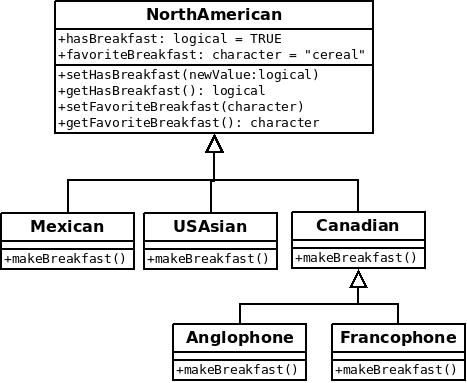

Diagram of the NorthAmerican derived classes.

A file with the full script is available at s3Inheritance.R . We do not provide the full code set here in order to keep the discussion somewhat under control. Our first step is to define the new classes.

In [32]:
Mexican <- function(eatsBreakfast=TRUE,myFavorite="los huevos")
{

        me <- NorthAmerican(eatsBreakfast,myFavorite)

        ## Add the name for the class
        class(me) <- append(class(me),"Mexican")
        return(me)
}


USAsian <- function(eatsBreakfast=TRUE,myFavorite="pork belly")
{

        me <- NorthAmerican(eatsBreakfast,myFavorite)

        ## Add the name for the class
        class(me) <- append(class(me),"USAsian")
        return(me)
}

Canadian <- function(eatsBreakfast=TRUE,myFavorite="back bacon")
{

        me <- NorthAmerican(eatsBreakfast,myFavorite)

        ## Add the name for the class
        class(me) <- append(class(me),"Canadian")
        return(me)
}

Anglophone <- function(eatsBreakfast=TRUE,myFavorite="pancakes")
{

        me <- Canadian(eatsBreakfast,myFavorite)

        ## Add the name for the class
        class(me) <- append(class(me),"Anglophone")
        return(me)
}

Francophone <- function(eatsBreakfast=TRUE,myFavorite="crepes")
{

        me <- Canadian(eatsBreakfast,myFavorite)

        ## Add the name for the class
        class(me) <- append(class(me),"Francophone")
        return(me)
}

With these definitions we can define an object. In this case we create an object from the Francophone class.

In [33]:
francois <- Francophone()
francois

$hasBreakfast
[1] TRUE

$favoriteBreakfast
[1] "crepes"

attr(,"class")
[1] "list"          "NorthAmerican" "Canadian"      "Francophone"

The thing to notice is that the class vector demonstrates the class inheritance structure. We can now define a method, makeBreakfast which will make use of the class structure.

In [34]:
makeBreakfast <- function(theObject)
        {
                print("Calling the base makeBreakfast function")
                UseMethod("makeBreakfast",theObject)
        }

makeBreakfast.default <- function(theObject)
        {
                print(noquote(paste("Well, this is awkward. Just make",
                                  getFavoriteBreakfast(theObject))))
                return(theObject)
        }

makeBreakfast.Mexican <- function(theObject)
        {
                print(noquote(paste("Estoy cocinando",
                                       getFavoriteBreakfast(theObject))))
                NextMethod("makeBreakfast",theObject)
                return(theObject)
        }

makeBreakfast.USAsian <- function(theObject)
        {
                print(noquote(paste("Leave me alone I am making",
                                               getFavoriteBreakfast(theObject))))
                NextMethod("makeBreakfast",theObject)
                return(theObject)
        }

makeBreakfast.Canadian <- function(theObject)
        {
                print(noquote(paste("Good morning, how would you like",
                                       getFavoriteBreakfast(theObject))))
                NextMethod("makeBreakfast",theObject)
                return(theObject)
        }

makeBreakfast.Anglophone <- function(theObject)
        {
                print(noquote(paste("I hope it is okay that I am making",
                                       getFavoriteBreakfast(theObject))))
                NextMethod("makeBreakfast",theObject)
                return(theObject)
        }

makeBreakfast.Francophone <- function(theObject)
        {
                print(noquote(paste("Je cuisine",
                                       getFavoriteBreakfast(theObject))))
                NextMethod("makeBreakfast",theObject)
                return(theObject)
        }


Note that the functions call the NextMethod function to call the next function in the list of classes.

In [35]:
francois <- makeBreakfast(francois)

[1] "Calling the base makeBreakfast function"


ERROR: Error in getFavoriteBreakfast(theObject): could not find function "getFavoriteBreakfast"


It is important to note the order that the methods are called. They are called from left to right in the list of classes. Another thing to note is that when the methods run out of class names the default function is called.